In [1]:
import pandas as pd
import requests
from xml.dom import minidom
from shapely.geometry import Point
import re
import time

In [2]:
# get SUGGEST id from PDOK locatieserver 
def request_pdok_suggest(address_key):
    """
    Get the suggested address id
    """
    url = 'https://geodata.nationaalgeoregister.nl/locatieserver/v3/suggest?wt=xml&q={}'.format(address_key)
    response = requests.get(url)
    # parse xml
    xmldoc = minidom.parseString(response.content)
    str_list = xmldoc.getElementsByTagName('str')
    # get str containing id
    str_tag = str_list[2]
    # get value of id
    id_suggest = str_tag.childNodes[0].nodeValue
    return id_suggest

In [3]:
def request_pdok_lookup(id_suggest):
    """
    Get the lookup location using the suggeseted address id
    """
    url = 'https://geodata.nationaalgeoregister.nl/locatieserver/v3/lookup?wt=xml&id={}'.format(id_suggest)
    response = requests.get(url)
    xmldoc = minidom.parseString(response.content)
    str_list = xmldoc.getElementsByTagName('str')
    for str_tag in str_list:        
        try:
            str_attr = str_tag.attributes['name'].value
        except: 
            c= 1            
        if str_attr == 'centroide_ll':                
            centroid_id = str_tag.childNodes[0].nodeValue
            centroid_split = re.split('[() ]', centroid_id)
            centroid_point = Point(float(centroid_split[1]), float(centroid_split[1]))
        else:
            continue
        return centroid_point

In [4]:
path_to_csv = r'D:\Projects\RO\basisonderwijs.csv'
df = pd.read_csv(path_to_csv, encoding='latin-1')

In [5]:
list_centroids = []
list_address_key = []
for idx, val in df.iterrows():    
    address_key = val['SLEUTEL_CSV']
    print (idx, address_key)
    id_suggest = request_pdok_suggest(address_key)
    centroid_point = request_pdok_lookup(id_suggest)
    
    list_centroids.append(centroid_point)
    list_address_key.append(address_key)
    time.sleep(2)

0 Oosterstraat 58 7822HG EMMEN
1 Bargermeerweg 113 7811LD EMMEN
2 Buiskoolstraat 1 7814RC EMMEN
3 Middenhaag 4 7815LB EMMEN
4 Smedingeslag 1 7824HK EMMEN
5 Houtweg 403 7823PS EMMEN
6 Barnar 5 A 7826EP EMMEN
7 Rolderbrink 128 130 7812PK EMMEN
8 Wilhelmsweg 85 A 7814VG EMMEN
9 Mantingerbrink 203 7812MD EMMEN
10 Eerste Koppelveenweg 2 7881EG EMMER-COMPASCUUM
11 Westerdiep OZ 96 7881HG EMMER-COMPASCUUM
12 Runde ZZ 84 7881HP EMMER-COMPASCUUM
13 Kanaal A NZ 102 7881KL EMMER-COMPASCUUM
14 Semsstraat 2 7887AD ERICA
15 Horizon 76 7891CV KLAZIENAVEEN
16 Voeghoutenstraat 23 7891LA KLAZIENAVEEN
17 Derksweg 22 7891PK KLAZIENAVEEN
18 Sportlaan 85 7833CH NIEUW-AMSTERDAM
19 Walevest 10 7885AK NIEUW-DORDRECHT
20 Gedempte Achterdiep 9 7831CJ NIEUW-WEERDINGE
21 Roswinkelerstraat 131 7895AR ROSWINKEL
22 De Blokken 22 7894CL ZWARTEMEER
23 Spanjaardspad 86 7761BR SCHOONEBEEK
24 Giervalk 20 7827HX EMMEN
25 Ganzenveld 85 7827SE EMMEN
26 A.L. Lesturgeonstraat 3 7815VD EMMEN
27 Zandzoom 19 7814VH EMMEN
28 Norge

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

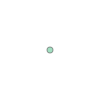

In [6]:
list_centroids[0]

In [7]:
list_address_key[0]

'Oosterstraat 58 7822HG EMMEN'

In [ ]:
response.content

In [ ]:
centroid_id

In [ ]:
point = Point(0.0, 0.0)

In [ ]:
point

In [ ]:
url = 'https://geodata.nationaalgeoregister.nl/locatieserver/v3/suggest?wt=xml&q={}'.format(address_key)
response = requests.get(url)
xmldoc = minidom.parseString(response.content)
str_list = xmldoc.getElementsByTagName('str')
str_tag = str_list[2]
#str_attr = str_tag.attributes['name'].value
id_suggest = str_tag.childNodes[0].nodeValue
# for str_tag in str_list:
#     try:
#         str_attr = str_tag.attributes['name'].value
#     except:
#         next
#     print(str_attr)
#     if str_attr == 'id':                
#         id_suggest = str_tag.childNodes[0].nodeValue
#         print(id_suggest)
#     else:
#         continue

In [ ]:
id_suggest

In [ ]:

#xmldoc = minidom.parse('items.xml')
#itemlist = xmldoc.getElementsByTagName('item')

In [ ]:
print(response.content)

In [ ]:
for atype in tree.findall('id'):
    print(atype)

In [ ]:
for atype in e.findall('type'):
    print(atype.get('foobar'))

In [ ]:
# get SUGGEST id from PDOK locatieserver 
def request_pdok_suggest(address_key):
    url = 'https://geodata.nationaalgeoregister.nl/locatieserver/v3/suggest?wt=xml&q={}'.format(address_key)
    response = requests.get(url)
    tree = ElementTree.fromstring(response.content)    
    return tree

In [ ]:
tree_suggest = request_pdok_suggest(address_key)

In [ ]:
tree_suggest.keys()

In [ ]:
for child in tree_suggest:
    print(child.tag, child.attrib)

In [ ]:



response = requests.get(url)

tree = ElementTree.fromstring(response.content)